# Plot customization


The `visualization` module in IDPET allows to create numerous types of plots to visualize properties of protein structural ensembles.

Most plots are rendered using the [`matplotlib` library](https://matplotlib.org/).

In addition to the built-in plotting utilities, IDPET also allows for fine-grained control over the visualizations, via interaction with the `matplotlib` objects.

In this notebook, we demonstrate several ways to customize and extend these plots.

## Load data from PED

We begin by loading two ensembles of the same protein from PED, which will serve as the basis for the plots in this notebook. We will use ensembles of the Sic1 protein.

In [ ]:
import matplotlib.pyplot as plt
from idpet.ensemble import Ensemble
from idpet.ensemble_analysis import EnsembleAnalysis
from idpet.visualization import *
from idpet.utils import set_verbosity


set_verbosity("INFO")  # Change verbosity level to show more information when performing the analysis.

ens_codes = [
    # IDPConformerGenerator ensemble with no experimental bias.
    Ensemble('PED00423e001', database='ped'),
    # IDPConformerGenerator ensemble with secondary structure biased by chemical shift data.
    Ensemble('PED00424e001', database='ped'),
    # Ensemble generated with the ENSEMBLE method with experimental biases.
    Ensemble('PED00160e001', database='ped'),
    # IdpGAN ensemble, unbiased.
    Ensemble('PED00487e002', database='ped'),
]


analysis = EnsembleAnalysis(ens_codes)
analysis.load_trajectories();

Ensemble PED00423e001 already downloaded. Skipping.
File PED00423e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00423e001.
Ensemble PED00424e001 already downloaded. Skipping.
File PED00424e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00424e001.
Ensemble PED00160e001 already downloaded. Skipping.
File PED00160e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00160e001.
Ensemble PED00487e002 already downloaded. Skipping.
File PED00487e002.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00487e002.
Loading trajectory for PED00423e001...
Loading trajectory for PED00424e001...
Loading trajectory for PED00160e001...
Loading trajectory for PED00487e002...


Let's visualize some properties of the ensembles

In [19]:
summary = analysis.get_features_summary_dataframe(
    selected_features=["rg", "end_to_end", "flory_exponent"],
    show_variability=False
)
display(summary)

,ensemble_code,n_residues,n_conformers,rg_mean,end_to_end_mean,flory_exponent
0,PED00423e001,92,1000,2.754694,6.596654,0.572076
1,PED00424e001,92,1000,2.779547,6.642599,0.559484
2,PED00160e001,92,500,2.814930,5.891140,0.441200
3,PED00487e002,92,100,2.540464,5.583080,0.461372


## Initializa a `Visualization` object.

You can use the `Visualization` class of IDPET to create plots.

In [20]:
visualization = Visualization(analysis)

## Customize an IDPET plot and save a figure

By default, all plots that you can create with IDPET, will use their create their own `Figure` and `Axes` objects from `matplotlib`.

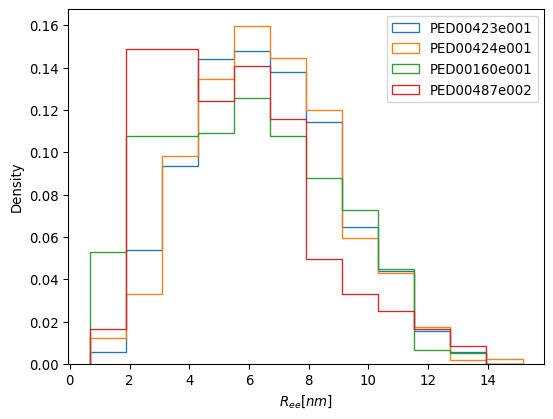

In [21]:
# Default IDPET behavior: the matplotlib figure will be created internally in the method.
visualization.end_to_end_distances(bins=12, violin_plot=False);

If you want to modify the plot, you can access the `Axes` object from `matplotlib`, because every `Visualization` method in IDPET will return the `Axes` object it created internally.

In the cell below, we will retrieve the `Axes` object and will modify the figure with some custom elements.

You can use this strategy with all IDPET plots.

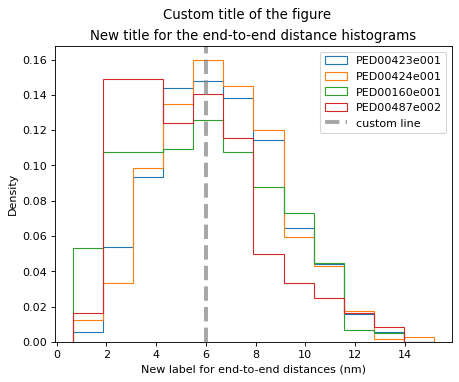

In [22]:
# We generate the same plot from befire, but now we store the `Axes` object in a variable.
ax = visualization.end_to_end_distances(bins=12, violin_plot=False)

# Add a custom vertical line.
ax.axvline(x=6.0, color="gray", linestyle="--", linewidth=3.5, alpha=0.7, label="custom line")
# Update the legend.
ax.legend()
# Change the title.
ax.set_title("New title for the end-to-end distance histograms")
# Change the x-axsis labels.
ax.set_xlabel("New label for end-to-end distances (nm)")

# We can also access the `Figure` object.
fig = ax.figure
# Add a suptitle
fig.suptitle("Custom title of the figure")
# Change the DPIs.
fig.set_dpi(80)

# Show the new plot.
plt.show()

When we have access to the `Figure` object, we can also save the figure to a file.

In [23]:
# Save the figure somewhere (uncomment below).
# fig.savefig("custom_plot.png", dpi=128)

## Provide a custom `Axes` object.

All plotting functions in IDPET allow you to provide your own Axes object, giving you greater control over the plots that you create.

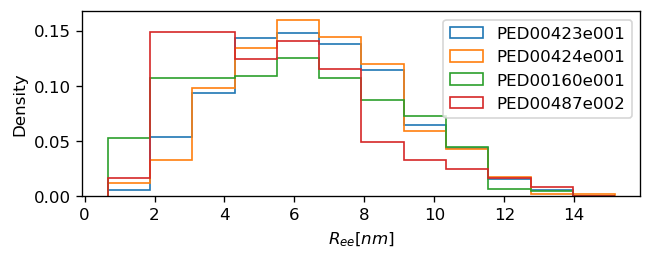

In [24]:
# Create custom wider figure and axis.
fig, ax = plt.subplots(dpi=120, figsize=(6, 2))

visualization.end_to_end_distances(
    bins=12, violin_plot=False,
    # Use the `ax` argument to provide custom axes.
    ax=ax
);

This will also work for IDPET functions that create multiple subplots, such as `distance_maps`, which show the average Cα-Cα distance matrices.

# Ensemble: PED00423e001
features: (1000, 4095)
# Ensemble: PED00424e001
features: (1000, 4095)
# Ensemble: PED00160e001
features: (500, 4095)
# Ensemble: PED00487e002
features: (100, 4095)


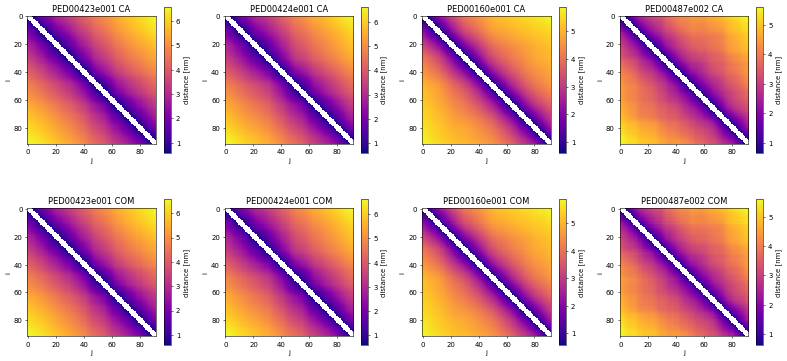

In [25]:
# Default visualization, with four ensemble this method will plot a 2x2 grid.
visualization.distance_maps(dpi=50);

We now provide custom axes and plot all matrices in a single row.

# Ensemble: PED00423e001
features: (1000, 4095)
# Ensemble: PED00424e001
features: (1000, 4095)
# Ensemble: PED00160e001
features: (500, 4095)
# Ensemble: PED00487e002
features: (100, 4095)


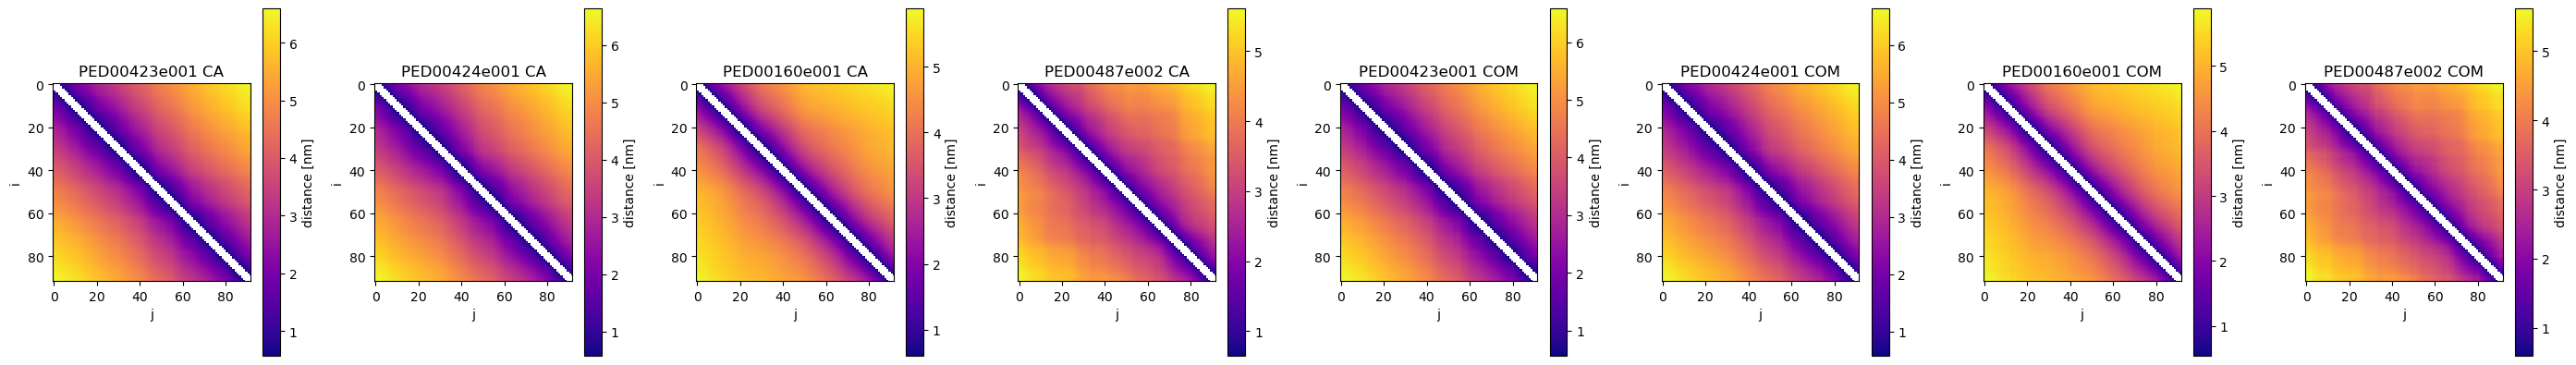

In [28]:
# Custom visualization, we need a plot with 4 subplots.
fig, ax = plt.subplots(1, 8, figsize=(28, 5))
visualization.distance_maps(ax=ax);
# Adjust the spaces between subplots.
plt.tight_layout()
# Show the plot.
plt.show()

## Make a plot with multiple subplots showing different types of data

Finally, we show how you can create a plot with multiple subplots each showing different ensemble properties, by combining the functionalities illusta

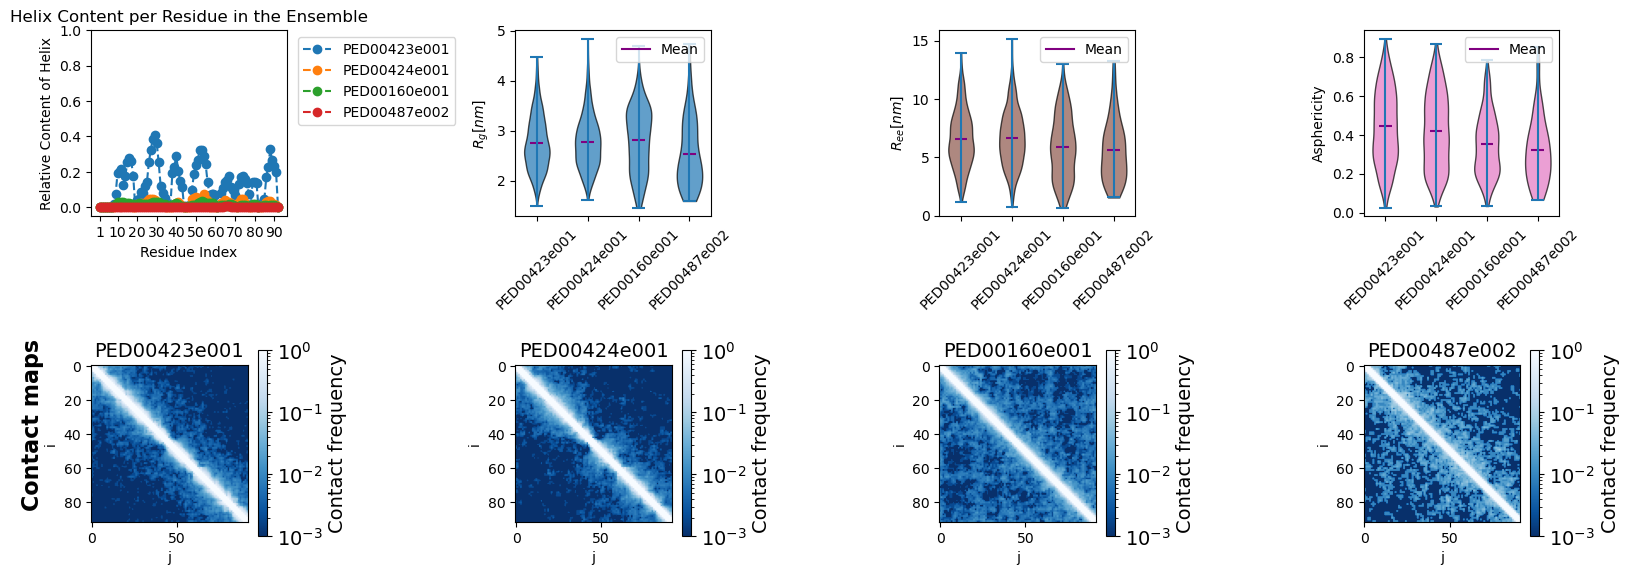

In [30]:
#--------
# Figure.
#--------

# Let's create an 2x4 plot.
fig, ax = plt.subplots(2, 4, figsize=(16, 6))

#-----------
# First row.
#-----------

# Helical secondary structure profiles in the ensembles.
ax_dssp = visualization.relative_dssp_content(ax=ax[0, 0], xtick_interval=10)
ax_dssp.set_ylim(-0.05, 1.0)  # Adjust the x-axis limits.

# Radius of gyration.
visualization.radius_of_gyration(ax=ax[0, 1], color="C0")
# End-to-end distance.
visualization.end_to_end_distances(ax=ax[0, 2], color="C5")
# Asphericity.
visualization.asphericity(ax=ax[0, 3], color="C6")

#------------
# Second row.
#------------

# Plot a Ca-Ca contact map.
cmap_axes = visualization.contact_prob_maps(
    ax=ax[1],  # Use the entire second row, with four columns, one for each subplot.
    color="Blues_r",
    avoid_zero_count=True
);
# Add a vertical label to highlight where the contact maps are.
fig.text(
    -0.45, 0.10,
    s="Contact maps",
    size=16,
    fontweight="bold",
    rotation="vertical",
    transform=cmap_axes[0].transAxes
)

#-----------------
# Adjust and show.
#-----------------

plt.tight_layout()
plt.show()